In [4]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import warnings

import astropy.units as u
import astropy.constants as c
from scipy import interpolate

from read import read_pbh, output_specs

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from dm21cm.injections.pbh import PBHInjection
from dm21cm.utils import abscs

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [5]:
injection = PBHInjection(
    m_PBH=10**13.5,
    f_PBH=1e-6,
)
injection.set_binning(abscs)

121 177
1041030000000.0 19477500000000.0


In [6]:
rs_s = []
rs = 3000
dlnz = 0.001
coarsen_factor = 1
while rs > 4:
    rs_s.append(rs)
    rs = np.exp(np.log(rs) - dlnz * coarsen_factor)
rs_s.append(rs)

In [13]:
z_power_s[:, 2]

array([1.25884931e+33, 1.56642903e+33, 1.90274427e+33, 2.25590284e+33,
       2.61016660e+33, 3.02369563e+33, 3.61597216e+33, 4.35231850e+33,
       5.14515073e+33, 5.97295034e+33, 6.79884937e+33, 7.76219401e+33,
       9.13366795e+33, 1.08215103e+34, 1.26110686e+34, 1.48887272e+34,
       1.77221342e+34, 2.07776977e+34, 2.39734303e+34, 2.71600100e+34,
       3.08778778e+34, 3.61681429e+34, 4.26805189e+34, 4.95879671e+34,
       5.84148732e+34, 6.94598391e+34, 8.14566472e+34, 9.72904341e+34,
       1.17584421e+35, 1.40177016e+35, 1.70592700e+35, 2.09968259e+35,
       2.54306357e+35, 1.38771246e+35])

(-10.0, 100.0)

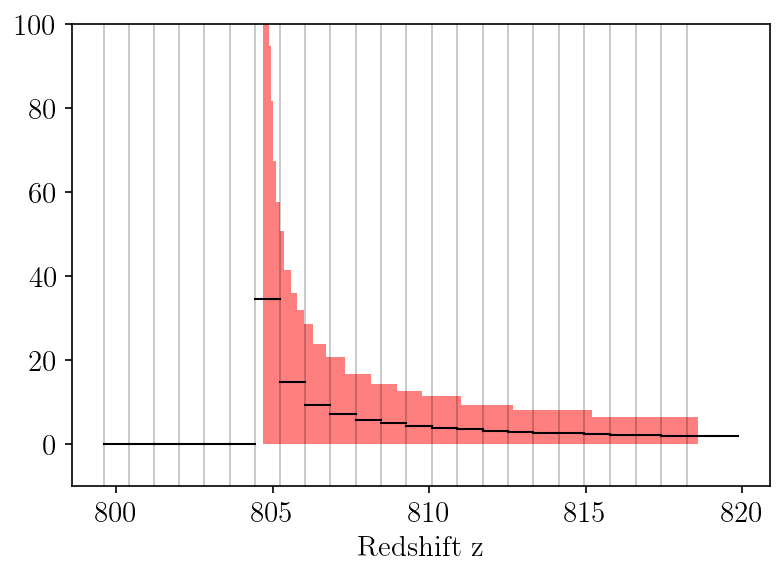

In [17]:
for rs in rs_s:
    if rs > 800 and rs < 820:
        plt.axvline(rs-1, color='k', linestyle='-', lw=0.2)

g_in_eV = (u.g*c.c**2).to('eV').value
for i, z in enumerate(injection.z_edges):
    if z > 800 and z < 820:
        if i == len(injection.z_edges) - 1:
            break
        dMdt = injection.dMdt_t(injection.t_s[i])
        z_next = injection.z_edges[i+1]
        power = injection.inj_power(z, z_end=z_next) / injection.n_PBH(z) / g_in_eV
        plt.fill_between([z, z_next], [dMdt, dMdt], 0, color='r', alpha=0.5, ec='none')
        # plt.plot([z, z_next], [power, power], color='k', lw=1)

for i, rs in enumerate(rs_s):
    z = rs - 1
    if z > 800 and z < 820:
        z_next = rs_s[i+1] - 1
        power = injection.inj_power(z, z_end=z_next) / injection.n_PBH(z) / g_in_eV
        plt.plot([z, z_next], [power, power], color='k', lw=1)

plt.xlabel('Redshift z')
plt.ylim(-10, 100)

In [24]:
rs_s = []
rs = 3000
dlnz = 0.001
coarsen_factor = 10
while rs > 41:
    rs_s.append(rs)
    rs = np.exp(np.log(rs) - dlnz * coarsen_factor)
rs_s.append(rs)

In [ ]:
for i, rs in enumerate(rs_s):
    z = rs - 1
    if z > 800:
        z_next = rs_s[i+1] - 1
        power = injection.inj_power(z, z_end=z_next) / injection.n_PBH(z) / g_in_eV
        power_inst = injection.inj_power(z) / injection.n_PBH(z) / g_in_eV
        print(z, power, power_inst)